# SkLearn_Train_Test_Sprint5_P2

#### Train-Test exercises with ScikitLearn from a dataset with information about Houston homes.

#### - Exercises 1
Split the attached data set in train and test. Study the two sets separately, at a descriptive level.

Also attached is a description of the different variables in the dataset.

#### - Exercises 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).

#### - Exercises 3
Summarize the new columns generated statistically and graphically



1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
from scipy import stats
import math

#### - Exercises 1
Split the attached data set in train and test. Study the two sets separately, at a descriptive level.

Also attached is a description of the different variables in the dataset.

In [2]:
#read dataframe
df_raw = pd.read_csv('housing_data.csv')
df_raw

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df= pd.DataFrame(np.vstack([df_raw.columns, df_raw])) #conversion column names into first row using vstack in numpy
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df.columns = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
             'PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# pd.DataFrame(np.vstack([df.columns, df])) #conversion column names into first row
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00000,506.0,506.0,506.0,506.000,506.000,506.0,506.0000,506.0,506.0,506.0,506.0,506.00,506.0
unique,504.00000,26.0,76.0,3.0,82.000,446.000,357.0,412.0000,10.0,67.0,47.0,358.0,455.00,230.0
top,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,7.79,50.0
freq,2.00000,372.0,132.0,470.0,22.000,3.000,43.0,5.0000,132.0,132.0,140.0,120.0,3.00,16.0


In [7]:
#datatype check
df.dtypes

CRIM       object
ZN         object
INDUS      object
CHAS       object
NOX        object
RM         object
AGE        object
DIS        object
RAD        object
TAX        object
PTRATIO    object
B          object
LSTAT      object
MEDV       object
dtype: object

In [8]:
df['CRIM']=df['CRIM'].astype(float)
df['ZN']=df['ZN'].astype(float)
df['INDUS']=df['INDUS'].astype(float)
df['CHAS']=df['CHAS'].astype(float)
df['NOX']=df['NOX'].astype(float)
df['RM']=df['RM'].astype(float)
df['AGE']=df['AGE'].astype(float)
df['DIS']=df['DIS'].astype(float)
df['RAD']=df['RAD'].astype(float)
df['TAX']=df['TAX'].astype(float)
df['PTRATIO']=df['PTRATIO'].astype(float)
df['B']=df['B'].astype(float)
df['LSTAT']=df['LSTAT'].astype(float)
df['MEDV']=df['MEDV'].astype(float)

In [9]:
#datatype check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
pip install -U scikit-learn

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.module import Model

In [11]:
#solution to Pandas KeyError: value not in index
#clean and format your column names
df.columns = (df.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))


/var/folders/mr/9tqv_fgx5djgxccybpsbhz440000gn/T/ipykernel_4128/2834779537.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns.str.strip().str.upper()
/var/folders/mr/9tqv_fgx5djgxccybpsbhz440000gn/T/ipykernel_4128/2834779537.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns.str.strip().str.upper()


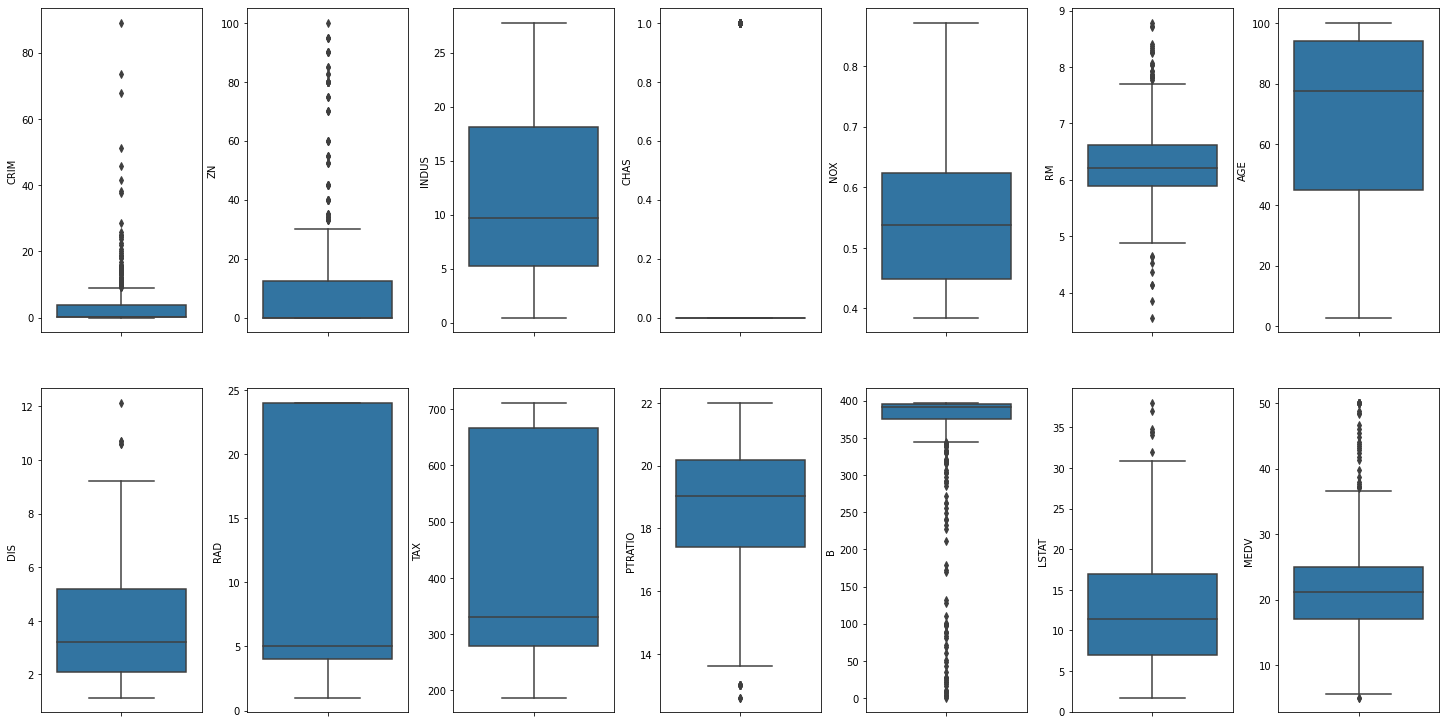

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Whit this boxplot visualization we can apreciate the value of each item. The first thing we can capreciate is that each item has its scale on Y axis (the numbers on Y are different from each other). The we can see the median of each item, max and min values and we can check for outliers. There are many item with outliers values: CRIM,  ZN, RM, DIS, PTRATIO, B, LSTAT, MEDV.

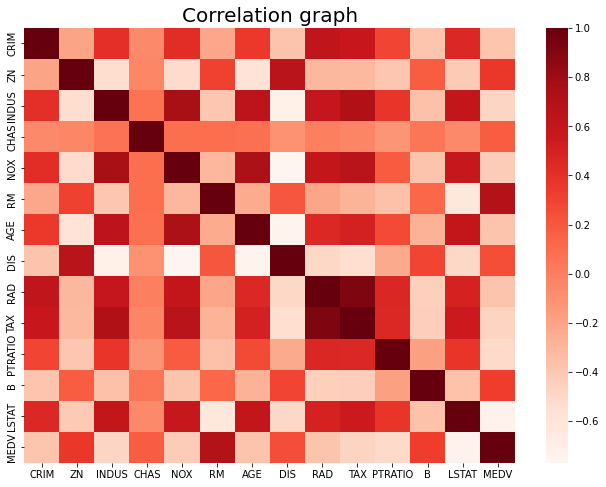

In [13]:
corr = df.corr()
plt.figure(figsize=(11,8))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, cmap="Reds")
plt.show()

We can use this visualization for select the relevant variables.
From the correlation matrix, we see TAX and RAD are highly correlated features. The columns NOX, INDUS, PTRATIO, RAD, AGE, LSTAT, has a correlation score around 0.5 or above 0.5 with CRIM which is a good indication of using as predictors. Let's plot these columns against CRIM.

#### Let start divide features and target and then let split data in train and test

In [14]:
#split features and target
features = ['INDUS','NOX','PTRATIO','LSTAT','RAD','AGE' ]
X = df.loc[:, features]
y = df.loc[:, ['CRIM']]

In [15]:
#split train and test of features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

#### Checking the new arrays:

In [16]:
X_train

,INDUS,NOX,PTRATIO,LSTAT,RAD,AGE
245,5.86,0.431,19.1,18.46,7.0,70.2
59,5.13,0.453,19.7,9.22,8.0,47.2
276,6.41,0.447,17.6,6.05,4.0,49.0
395,18.10,0.693,20.2,17.12,24.0,98.8
416,18.10,0.679,20.2,25.79,24.0,90.8
...,...,...,...,...,...,...
323,7.38,0.493,19.6,11.74,5.0,74.3
192,3.44,0.437,15.2,2.87,5.0,26.3
117,10.01,0.547,17.8,10.30,6.0,82.6
47,6.91,0.448,17.9,18.80,3.0,85.5


In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

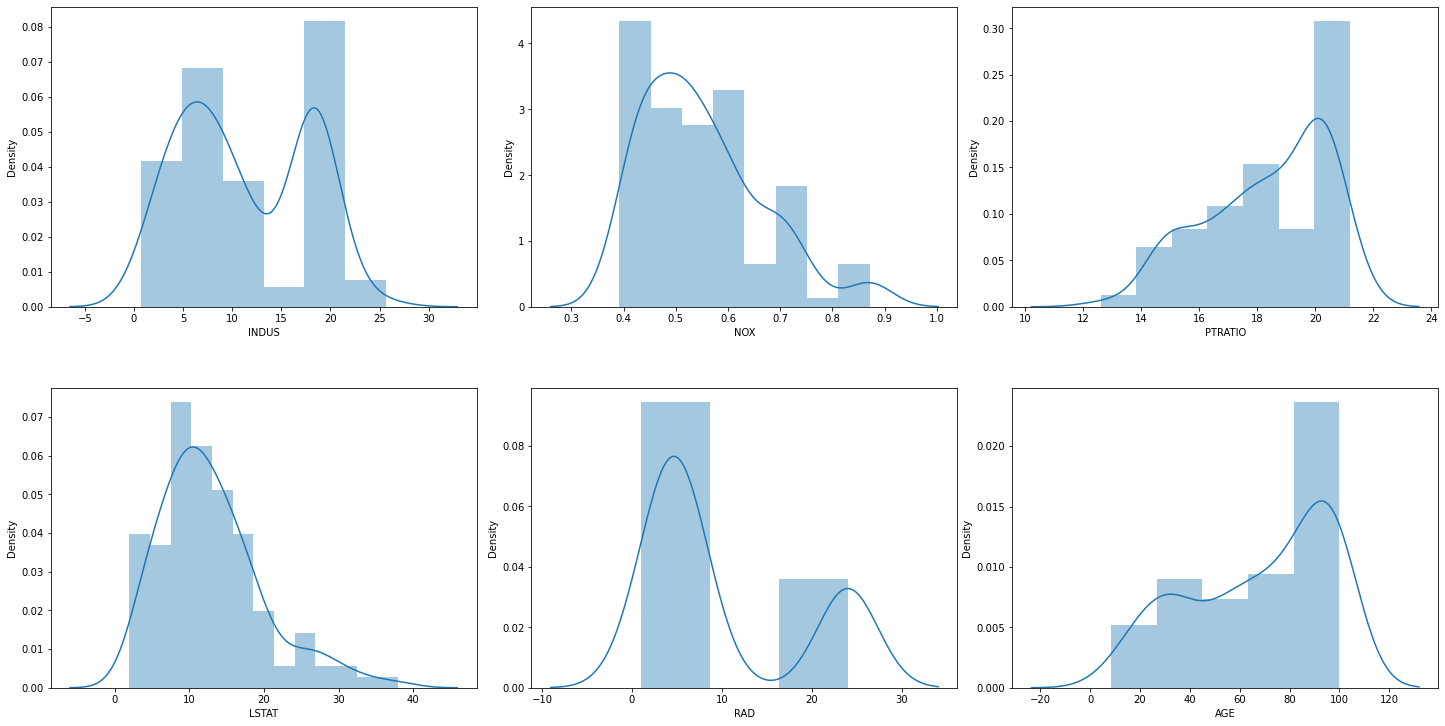

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_test.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [18]:
X_test.describe()

,INDUS,NOX,PTRATIO,LSTAT,RAD,AGE
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,11.295748,0.550322,18.353543,12.971732,9.960630,68.095276
std,6.379111,0.115321,2.087331,6.971946,8.821332,28.057268
min,0.740000,0.392000,12.600000,1.920000,1.000000,8.400000
25%,6.075000,0.448000,16.750000,8.615000,4.000000,43.600000
50%,9.900000,0.524000,18.700000,11.970000,5.000000,74.900000
75%,18.100000,0.605000,20.200000,16.020000,24.000000,95.600000
max,25.650000,0.871000,21.200000,37.970000,24.000000,100.000000


/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

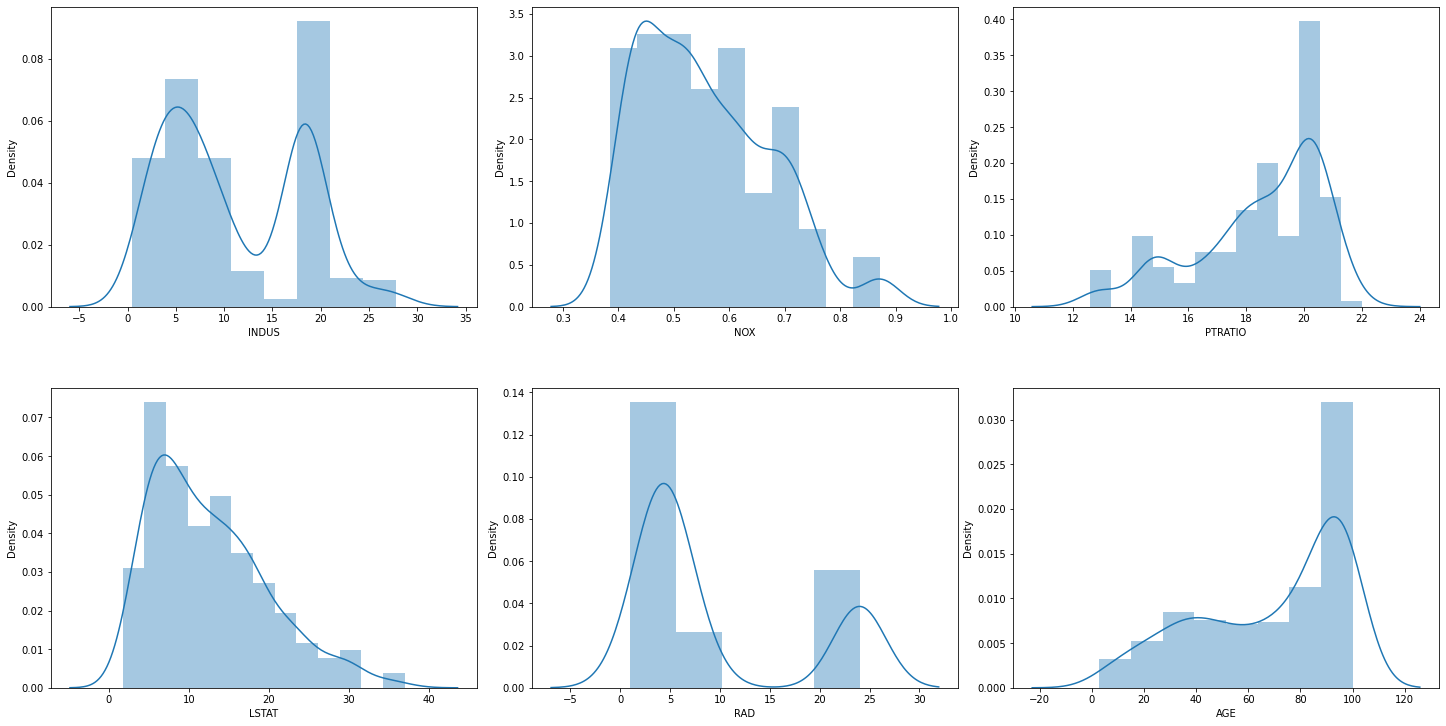

In [19]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_train.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [20]:
X_train.describe()

,INDUS,NOX,PTRATIO,LSTAT,RAD,AGE
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,11.083509,0.556160,18.489710,12.546280,9.411609,68.735620
std,7.021496,0.116179,2.191971,7.202756,8.676092,28.214667
min,0.460000,0.385000,12.600000,1.730000,1.000000,2.900000
25%,5.040000,0.449000,17.400000,6.700000,4.000000,45.250000
50%,8.560000,0.538000,19.100000,11.220000,5.000000,78.100000
75%,18.100000,0.631000,20.200000,17.030000,24.000000,93.800000
max,27.740000,0.871000,22.000000,36.980000,24.000000,100.000000


#### Exercises 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).

#### Data pre-processing

Normalization:

In [21]:
from sklearn import preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

Let create a new dataframes as a base for working on. I took the column PTRATIO and PTRATIO and LSTAT as items for apply preprocessig methods. 

For do that I created two different way to arrive to the same results. I worked on it separately and keep them both since this document is a train.

Mode 1: working on 1 item: 'PTRATIO'.

In [23]:
X_train_2=X_train.iloc[:, 2:3]

X_train_2.head()

,PTRATIO
245,19.1
59,19.7
276,17.6
395,20.2
416,20.2


#### RobustScaler()
First we use RobustScaler. Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard deviation, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance). Standardization can become skewed or biased if the input variable contains outlier values.

To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling.

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

In [24]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(X_train_2)

#### StandardScaler

Data Standardization
Standardizing a dataset involves rescaling the distribution of values transforming the mean of observed values into 0 and the standard deviation into 1.

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results. 

We can standardize our dataset using the scikit-learn object StandardScaler.

In [25]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X_train_2)

#### MinMaxScaler

Normalization scales each input variable separately to the range 0-1 fpr defoult, it can be changed. It is the range for floating-point values where we have the most precision. This scikit-learn object give us a  way to normalize the input features/variables. By doing so, all features will be transformed into the range 0- 1 so the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively. 

In [26]:
#from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X_train_2)

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

[Text(0.5, 1.0, 'X_Train_2 PTRATIO wityh MinMaxScaler')]

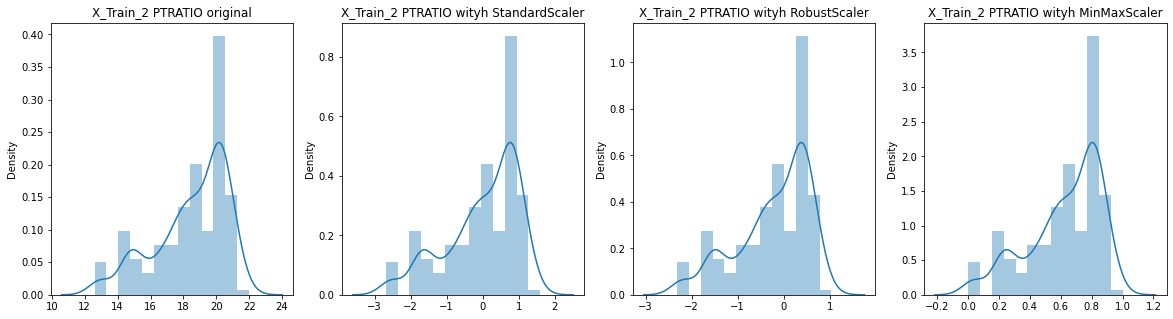

In [27]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(X_train_2, ax=axs[0]).set(title='X_Train_2 PTRATIO original')
sns.distplot(robust_df, ax=axs[2]).set(title='X_Train_2 PTRATIO wityh RobustScaler')
sns.distplot(standard_df, ax=axs[1]).set(title='X_Train_2 PTRATIO wityh StandardScaler')
sns.distplot(minmax_df, ax=axs[3]).set(title='X_Train_2 PTRATIO wityh MinMaxScaler')


[Text(0.5, 1.0, 'X_Train_2 PTRATIO wityh MinMaxScaler')]

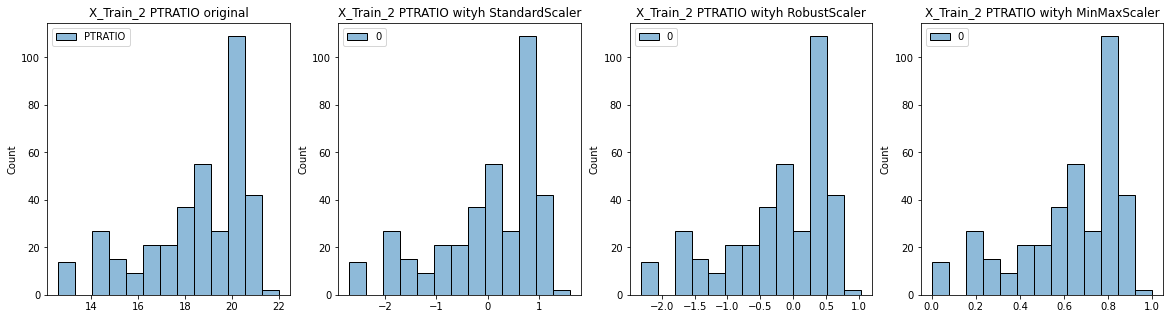

In [28]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.histplot(X_train_2, ax=axs[0]).set(title='X_Train_2 PTRATIO original')
sns.histplot(robust_df, ax=axs[2]).set(title='X_Train_2 PTRATIO wityh RobustScaler')
sns.histplot(standard_df, ax=axs[1]).set(title='X_Train_2 PTRATIO wityh StandardScaler')
sns.histplot(minmax_df, ax=axs[3]).set(title='X_Train_2 PTRATIO wityh MinMaxScaler')

-------------


Mode 2: working on 2 items.

In [29]:
X_train_3=X_train.iloc[:, 2:4]

X_train_3.head()

,PTRATIO,LSTAT
245,19.1,18.46
59,19.7,9.22
276,17.6,6.05
395,20.2,17.12
416,20.2,25.79


In [30]:
def plots(X_train_3, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

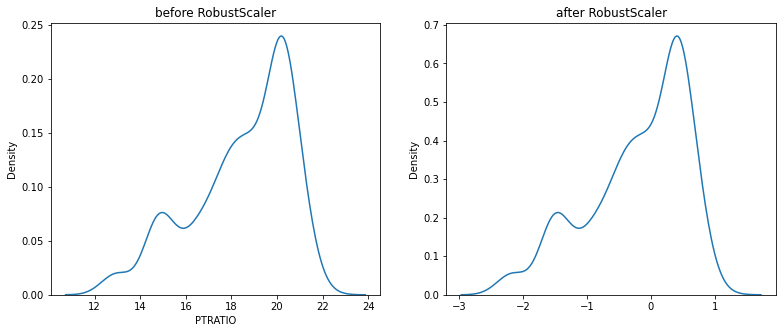

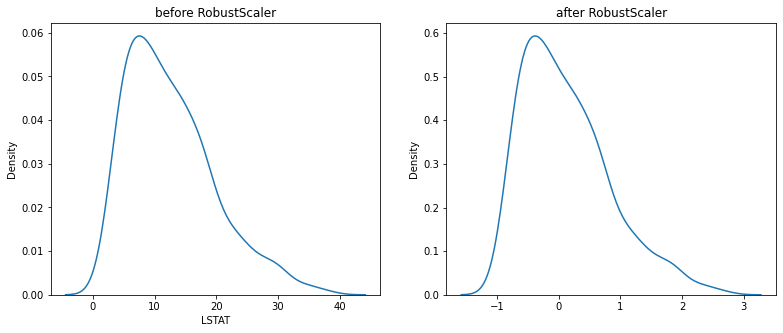

In [31]:
for col in X_train_3.columns:
    
    plots(X_train_3, col, RobustScaler())

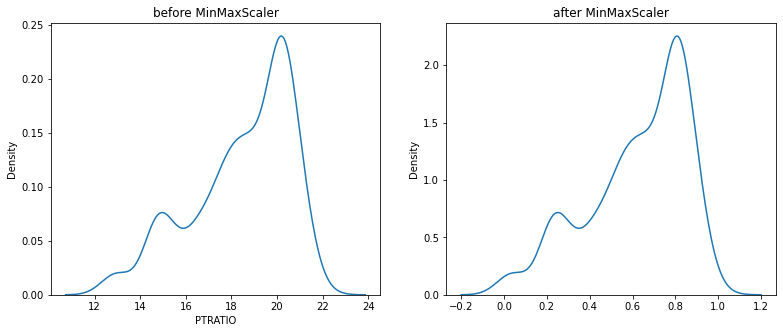

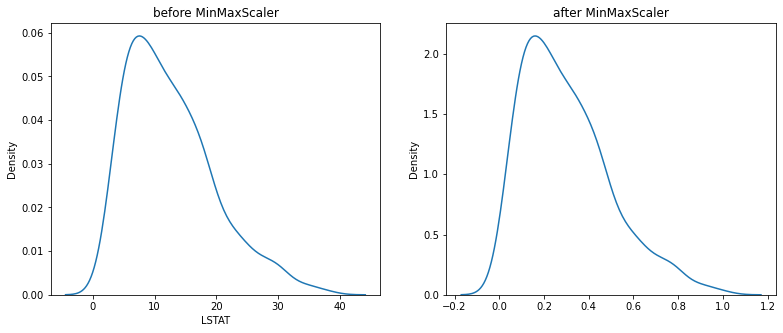

In [32]:
for col in X_train_3.columns:
    plots(X_train_3, col, MinMaxScaler())

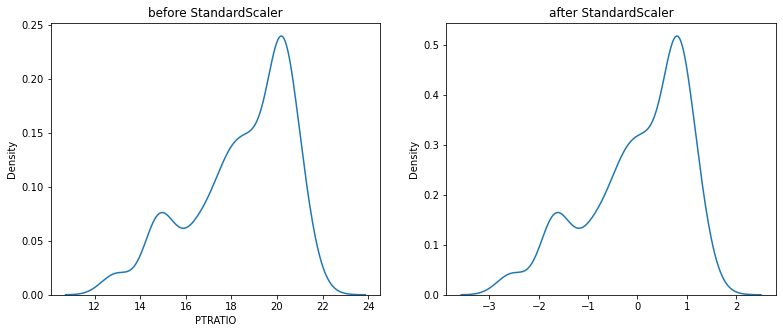

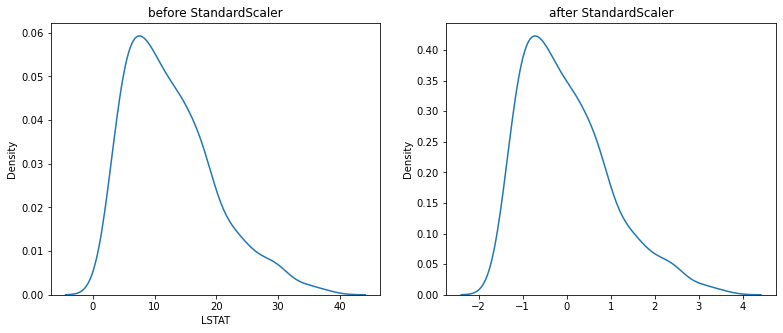

In [33]:
for col in X_train_3.columns:
    plots(X_train_3, col, StandardScaler())

#### PolynomialFeatures

Polynomial features are those features created by raising existing features to an exponent. As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

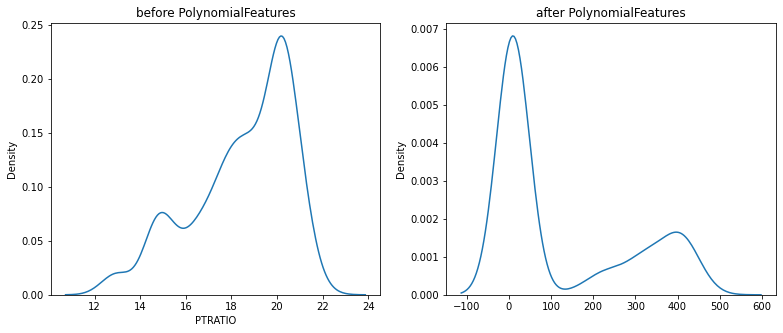

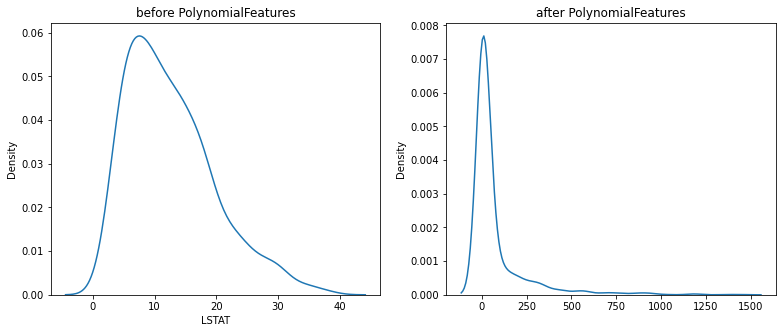

In [34]:
from sklearn.preprocessing import PolynomialFeatures
for col in X_train_3.columns:
    plots(X_train_3, col, PolynomialFeatures())

#### Dummies columns:

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.

Let perform dumies columns taking "RAD" as a categorical data.



In [ ]:
df['RAD']=df['RAD'].astype(str)

In [ ]:
# create dummy variables
df_dummy = pd.get_dummies(data = df, columns= ['RAD'])
df_dummy

#### Conclusions

- It is important to split the database in train and test by using similar data for training and testing In this way is possible to minimize the effects of data discrepancies and better understand the characteristics of the model. After a model has been processed by using the training set, you test the model by making predictions against the test set.

- It is important to select the target variable and using data visualization as correlation matrix for select the correct variables.

- Visualize data before and after pre-processing is not trivial. It is important to see how data looks like before  being submited to the machinelearning model.

- Pre-processing before creating a Machine Learning model. Data preprocessing is the first step marking the initiation of the process. Typically, real-world data is incomplete, inconsistent, inaccurate (contains errors or outliers), and often lacks specific attribute values/trends. This is where data preprocessing is applied. It helps to clean, format, and organize the raw data, thereby making it ready-to-go for Machine Learning models. 

- Is relevant to use Dummies colums when we are in front of categorical data. A dummy column presents a value of 1 when a categorical event occurs and a 0 when it doesn't occur. In most cases this is a feature of the event/object being described.

Sources:
    
https://www.journaldev.com/18341/python-scikit-learn-tutorial

Train test split tutorial:
https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1


https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

Train-Test Split for Evaluating Machine Learning Algorithms
https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

Pre- processing tutorial and a bit of theory.
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Dummi colums
https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/

Data pre-processing
https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/